In [1]:
import pandas as pd
import rocketxg.plotting as rplot

In [14]:
data = pd.read_parquet("../data/2024-EUMajor1-Qual1-Day3/data.parquet")
data

,game_id,is_goal,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,op_0_pos_x,op_0_pos_y,...,op_2_vel_y,op_2_vel_z,op_2_boost_amount,shooter_pos_x,shooter_pos_y,shooter_pos_z,shooter_vel_x,shooter_vel_y,shooter_vel_z,shooter_boost_amount
0,ba39dd0d5fff49f9a8e52eea9c26aefd,False,-2119.370117,2822.739990,156.839996,2019.420044,1856.150024,53.950001,-1414.119995,5102.990234,...,41.049999,-93.900002,40.000000,-2280.820068,2579.969971,147.020004,669.619995,2192.679932,183.720001,57.068321
1,ba39dd0d5fff49f9a8e52eea9c26aefd,False,1997.540039,-1584.979980,108.849998,-1303.189941,2592.360107,571.909973,-3382.889893,2672.090088,...,-1546.890015,405.320007,79.337891,2137.560059,-1778.780029,79.029999,-792.320007,2141.979980,272.250000,73.992828
2,ba39dd0d5fff49f9a8e52eea9c26aefd,False,-3788.669922,503.109985,1862.229980,1327.189941,2111.600098,765.609985,-2917.570068,3938.889893,...,1976.510010,-89.769997,0.000000,-3897.290039,294.350006,1759.310059,516.719971,1508.770020,1657.280029,22.410851
3,ba39dd0d5fff49f9a8e52eea9c26aefd,True,-538.559998,4805.979980,332.359985,1378.839966,2918.070068,36.599998,435.839996,5698.899902,...,514.159973,0.140000,89.019608,-700.460022,4577.660156,259.470001,758.820007,1748.869995,615.840027,57.170456
4,ba39dd0d5fff49f9a8e52eea9c26aefd,False,-62.529999,2825.669922,216.779999,66.230003,2868.530029,248.550003,65.570000,3531.179932,...,1983.780029,0.280000,43.921570,17.990000,2799.899902,122.080002,746.130005,2099.239990,55.160000,12.445627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,2cdb1367441448068721fc1515a0008d,False,3969.870117,3091.040039,346.609985,1677.969971,871.349976,1531.020020,-589.450012,4267.750000,...,-1593.050049,448.739990,16.903658,3861.260010,2939.179932,275.489990,1039.609985,448.899994,536.130005,58.911293
3446,2cdb1367441448068721fc1515a0008d,False,3280.500000,1471.709961,972.030029,-1243.760010,2041.150024,130.250000,3737.469971,644.229980,...,1651.300049,5.250000,60.000000,3434.010010,1434.890015,884.489990,-844.200012,2073.879883,-15.510000,16.078432
3447,2cdb1367441448068721fc1515a0008d,True,244.110001,4500.790039,97.139999,1041.329956,2642.820068,-304.179993,-1398.130005,4317.569824,...,1362.880005,-82.089996,5.098039,214.479996,4311.939941,14.530000,1168.530029,1431.589966,381.869995,20.364069
3448,2cdb1367441448068721fc1515a0008d,False,428.630005,4567.290039,400.459991,180.690002,127.449997,-1374.920044,464.309998,4734.819824,...,-645.179993,-521.909973,25.098040,310.359985,4466.939941,473.660004,-956.309998,475.000000,-1186.770020,4.009783


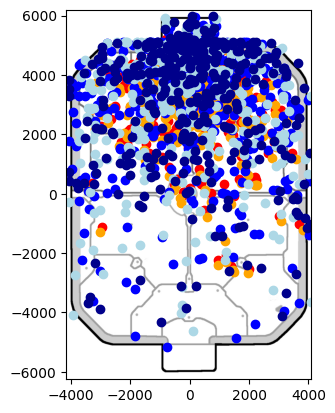

In [15]:
fig, ax = rplot.plot_field()
shot_ind = 100
shot = data[data["is_goal"]]
ax.scatter(shot["ball_pos_x"], shot["ball_pos_y"], color="red")
ax.scatter(shot["shooter_pos_x"], shot["shooter_pos_y"], color="orange")
ax.scatter(shot["op_0_pos_x"], shot["op_0_pos_y"], color="blue")
ax.scatter(shot["op_1_pos_x"], shot["op_1_pos_y"], color="lightblue")
ax.scatter(shot["op_2_pos_x"], shot["op_2_pos_y"], color="darkblue")

C:\Users\Violet\AppData\Local\Temp\ipykernel_20660\1873790216.py:5: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


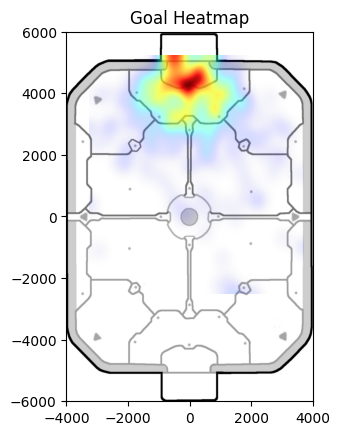

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from scipy.ndimage.filters import gaussian_filter

# Choose colormap
cmap = cm.jet

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# Create new colormap
my_cmap = ListedColormap(my_cmap)


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


# Generate some test data
shot = data[data["is_goal"]]
x = shot["ball_pos_x"]
y = shot["ball_pos_y"]

sigma = 32
fig, ax = rplot.plot_field()
img, extent = myplot(x, y, sigma)
ax.imshow(img, extent=extent, origin='lower', cmap=my_cmap)
# ax.scatter(shot["ball_pos_x"], shot["ball_pos_y"])
ax.set_title("Goal Heatmap")
ax.set_xlim(-4000, 4000)
ax.set_ylim(-6000, 6000)

plt.show()

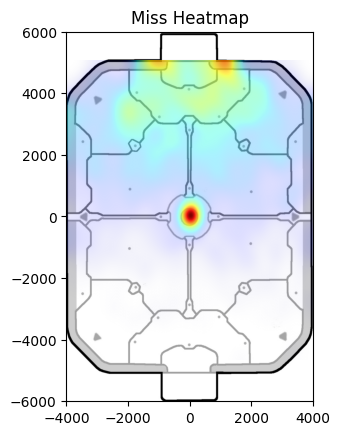

In [17]:
# Generate some test data
shot = data[~data["is_goal"]]
x = shot["ball_pos_x"]
y = shot["ball_pos_y"]

sigma = 32
fig, ax = rplot.plot_field()
img, extent = myplot(x, y, sigma)
ax.imshow(img, extent=extent, origin='lower', cmap=my_cmap)
# ax.scatter(shot["ball_pos_x"], shot["ball_pos_y"])
ax.set_title("Miss Heatmap")
ax.set_xlim(-4000, 4000)
ax.set_ylim(-6000, 6000)

plt.show()